In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Read the CSV and Perform Basic Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [28]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
#df = pd.get_dummies(df)
# Drop extra dummy columns
#df = df.drop(columns=['koi_disposition_FALSE POSITIVE','koi_disposition_CONFIRMED'])
#df.head()
### END SOLUTION

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0


# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad','ra','dec','koi_kepmag']]
selected_features.head()

,koi_disposition,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,54.418383,162.513840,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,19.899140,175.850252,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,1.736952,170.307565,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,2.525592,171.595550,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,4.134435,172.979370,4.486,0.972,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [5]:
X = selected_features.drop("koi_disposition", axis=1)
y = selected_features["koi_disposition"] #.values.reshape(-1, 1)
print(X.shape, y.shape)

(6991, 7) (6991,)


In [6]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.head()

,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
3563,10.548413,139.064020,4.387,1.092,298.09543,44.737061,13.204
4099,24.754385,140.207320,4.519,0.804,295.73535,42.576248,15.514
5460,1.057336,131.792007,4.594,0.683,292.18417,49.310040,15.414
1091,201.118319,187.569860,4.447,0.954,283.11377,48.131390,13.328
5999,91.649983,175.715600,4.145,1.608,294.93198,39.812420,12.964


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
# YOUR CODE HERE
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
print(X_train_scaled.shape, y_train_categorical.shape)
df_y_train = pd.DataFrame(y_train_categorical)
df_y_train

(5243, 7) (5243, 3)


,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
5238,0.0,1.0,0.0
5239,0.0,0.0,1.0
5240,0.0,0.0,1.0
5241,0.0,1.0,0.0


In [12]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_categorical)
print(X_train_scaled.shape, y_train_categorical.shape)

(5243, 7) (5243, 3)


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select = SelectKBest(chi2, k=3)
train_new_xy = select.fit_transform(X_train_scaled, y_train_categorical)
filter = select.get_support()
cols = selected_features.columns.array
features = cols[1:]
print(features)
print(features[filter])
X_train_scaled.shape


<PandasArray>
['koi_period', 'koi_time0bk', 'koi_slogg', 'koi_srad', 'ra', 'dec',
 'koi_kepmag']
Length: 7, dtype: object
<PandasArray>
['koi_period', 'ra', 'dec']
Length: 3, dtype: object


(5243, 7)

In [26]:
#In X keep only cols koi_period is 0 ,ra is 4 and dec is 5
X_train_featured = np.delete(X_train_scaled,[1,2,3,6], axis=1)
X_test_featured = np.delete(X_test_scaled,[1,2,3,6], axis=1)

X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2
0,0.009570,0.834973,0.517791
1,0.022835,0.726932,0.380672
2,0.000707,0.564363,0.807980
3,0.187517,0.149133,0.733186
4,0.085300,0.690154,0.205287
...,...,...,...
5238,0.048340,0.449696,0.261639
5239,0.001950,0.757801,0.463152
5240,0.000720,0.884194,0.272465
5241,0.017225,0.380357,0.586290


In [27]:
X_test_featured.shape
y_test_categorical.shape


(1748, 3)

In [28]:
X_train_featured.shape
y_train_categorical.shape

(5243, 3)

# Train the Model

In [29]:
# First, create a normal neural network with 2 inputs, 6 hidden nodes, and 3 outputs
# YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=3, activation='relu', input_dim=3))
#model.add(Dense(units=18, activation='relu'))
#model.add(Dense(units=18, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
y_train_categorical.reshape(-1, 1)
y_test_categorical.reshape(-1, 1)

print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(5243, 3) (5243, 3)
(1748, 3) (1748, 3)


In [32]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_featured,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
164/164 - 0s - loss: 1.0474 - accuracy: 0.4949 - 324ms/epoch - 2ms/step
Epoch 2/100
164/164 - 0s - loss: 1.0331 - accuracy: 0.4949 - 104ms/epoch - 637us/step
Epoch 3/100
164/164 - 0s - loss: 1.0289 - accuracy: 0.4949 - 86ms/epoch - 526us/step
Epoch 4/100
164/164 - 0s - loss: 1.0267 - accuracy: 0.4949 - 114ms/epoch - 695us/step
Epoch 5/100
164/164 - 0s - loss: 1.0248 - accuracy: 0.4949 - 86ms/epoch - 523us/step
Epoch 6/100
164/164 - 0s - loss: 1.0231 - accuracy: 0.4949 - 113ms/epoch - 686us/step
Epoch 7/100
164/164 - 0s - loss: 1.0217 - accuracy: 0.4949 - 92ms/epoch - 562us/step
Epoch 8/100
164/164 - 0s - loss: 1.0203 - accuracy: 0.4949 - 81ms/epoch - 493us/step
Epoch 9/100
164/164 - 0s - loss: 1.0191 - accuracy: 0.4949 - 79ms/epoch - 485us/step
Epoch 10/100
164/164 - 0s - loss: 1.0180 - accuracy: 0.4949 - 79ms/epoch - 479us/step
Epoch 11/100
164/164 - 0s - loss: 1.0171 - accuracy: 0.4949 - 87ms/epoch - 529us/step
Epoch 12/100
164/164 - 0s - loss: 1.0162 - accuracy: 0.4948 -

In [33]:
model_loss, model_accuracy = model.evaluate(X_train_featured, y_train_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

164/164 - 0s - loss: 0.9885 - accuracy: 0.5241 - 231ms/epoch - 1ms/step
Normal Neural Network - Loss: 0.9884936809539795, Accuracy: 0.5241274237632751


In [34]:
print(f"Training Data Score: {model.evaluate(X_train_featured, y_train_categorical)}")
print(f"Testing Data Score: {model.evaluate(X_test_featured, y_test_categorical)}")

164/164 [==============================] - 0s 561us/step - loss: 0.9885 - accuracy: 0.5241
Training Data Score: [0.9884936809539795, 0.5241274237632751]
55/55 [==============================] - 0s 794us/step - loss: 0.9782 - accuracy: 0.5389
Testing Data Score: [0.9781593084335327, 0.5389016270637512]


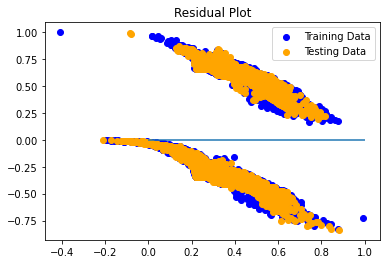

In [39]:
# Create a LinearRegression model and fit it to the scaled training data
y_train_categorical

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
modelLG = LinearRegression()
modelLG.fit(X_train_featured, y_train_categorical)
### END SOLUTION

# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = modelLG.predict(X_test_featured)

plt.scatter(modelLG.predict(X_train_featured), y_train_categorical - model.predict(X_train_featured), c="blue", label="Training Data")
plt.scatter(modelLG.predict(X_test_featured), y_test_categorical - model.predict(X_test_featured), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_categorical.min(), xmax=y_test_categorical.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [40]:
# Create the GridSearchCV model
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma='auto')
clf = GridSearchCV(svc, parameters)

# Train the model with GridSearch
clf.fit(X_test_scaled, y_test_categorical)
df = pd.DataFrame(clf.cv_results_)
print(clf.best_params_)
print(clf.best_score_)

C:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\antoi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 883, in check_X_y
    y = column_or_1d(y, warn=True)
  File "C:\Users\antoi

ValueError: y should be a 1d array, got an array of shape (1748, 3) instead.

In [57]:
# Make predictions with the hypertuned model
predictions = clf.predict(X_test_scaled)

In [58]:
print('Test Acc: %.3f' % clf.score(X_test_scaled, y_test_categorical))

Test Acc: 0.769


In [63]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, predictions, X_test_scaled))

C:\Users\antoi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[[0.06173709 0.04998235 0.85687418 0.00361304]
 [0.1401416  0.06266117 0.82979124 0.00469695]
 [0.3471618  0.21031232 0.82076359 0.00546958]
 ...
 [0.05054771 0.02540901 0.83618582 0.00399102]
 [0.02041358 0.02063517 0.73312018 0.00909374]
 [0.00423046 0.01064108 0.68290389 0.01188412]] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [60]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.768879
1,1,rbf,0.768879
2,10,linear,0.768879
3,10,rbf,0.768879


In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma='auto'),
        'params' : {
            'C' : [1,5,10,50],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50]
        }
    },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [35]:
scores= []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_test_scaled, encoded_y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

In [36]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.520023,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.537189,{'n_estimators': 50}
2,logistic_regression,0.520023,{'C': 1}


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'antoinetteboyle.sav'
joblib.dump(model, filename)